# Problem 1 (Quadratic and n-Dim Inference) using TensorFlow

In [1]:
import importlib

import keras
import pandas as pd
from keras import layers

import jkcsoft
from jkcsoft.ml.keras_utils import compose_model, KernelLoggerCallback

importlib.reload(jkcsoft.ml.keras_utils)

keras.backend.clear_session()


In [2]:
import numpy as np


def load_csv(file_path):
    data = pd.read_csv(file_path)  # Read the data file
    m_x = data['x'].values.reshape(-1, 1)  # Reshape into 2D array for TensorFlow
    m_y = data['y'].values.reshape(-1, 1)
    return m_x, m_y

def generate_quadratic_data(num_points=100):
    _x = np.linspace(-num_points / 10, num_points / 10, num_points)  # Example quadratic data
    _y = _x ** 2 + np.random.normal(0, 5, size=_x.shape)  # Quadratic with noise
    return _x, _y


# Load data using the helper method
#x, y = load_csv('../../data/two-points-xy.csv')
x, y = generate_quadratic_data()

# Define a simple sequential model
model, _ = compose_model(keras.Input(shape=(1,)),
                         [
#                             layers.Dense(10, activation='relu', kernel_initializer='he_uniform'),
                             layers.Dense(4, activation='linear'),
                             layers.Dense(1)
                         ])

print(f"model summary: {model.summary()}")

# Compile the model
model.compile(optimizer='adam', loss='mse')

callback = KernelLoggerCallback(model.layers[1:])

# Train the model. Expensive bit ...
model.fit(x, y, epochs=200, batch_size=10, verbose=0, callbacks=[callback])

# Predict y given x
predictions = model.predict(x)

# Display predictions
print(predictions)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

model summary: None

Epoch 1: Kernel weights for layer 'dense path=dense':
[[-0.5546788 -0.806862  -0.8791668 -0.6228804]]
Bias weights for layer '[-0.00868382  0.00869274 -0.00867591  0.00869174]':

Epoch 1: Kernel weights for layer 'dense_1 path=dense_1':
[[-0.7094839 ]
 [ 0.7857355 ]
 [-0.26159802]
 [ 1.0277957 ]]
Bias weights for layer '[0.00966164]':

Epoch 2: Kernel weights for layer 'dense path=dense':
[[-0.54559344 -0.815999   -0.8701281  -0.63201165]]
Bias weights for layer '[-0.01798206  0.01803682 -0.01793253  0.01803072]':

Epoch 2: Kernel weights for layer 'dense_1 path=dense_1':
[[-0.7004111 ]
 [ 0.79487526]
 [-0.25251037]
 [ 1.0369431 ]]
Bias weights for layer '[0.01950545]':

Epoch 3: Kernel weights for layer 'dense path=dense':
[[-0.53674144 -0.82496005 -0.86137766 -0.64096075]]
Bias weights for layer '[-0.02694169  0.02710646 -0.02678971  0.02708825]':

Epoch 3: Kernel weights for layer 'dense_1 path=dense_1':
[[-0.691586  ]
 [ 0.80384177]
 [-0.24365345]
 [ 1.0459261 

Plots and schemes

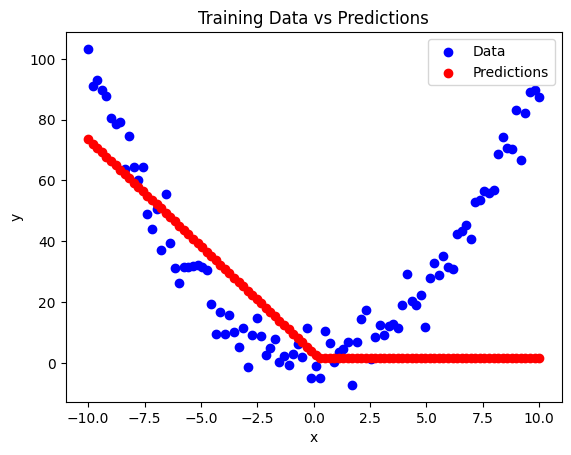

In [3]:
import matplotlib.pyplot as plt

# Plot the scatter data
plt.scatter(x, y, label='Data', color='blue')
plt.scatter(x, predictions, label='Predictions', color='red')

# Plot the best-fit line
# plt.plot(x, best_fit_line, color='red', label=f'Best Fit Line (r={r_value:.2f})')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data vs Predictions')
plt.legend()
plt.show()
